<a href="https://colab.research.google.com/github/gsabarinath02/Intrusion-Detection-using-ML/blob/main/IntDect_Binary_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
col_names = ["A1","A2","A3","A4","A5",
    "A6","A7","A8","A9","A10","A11",
    "A12","A13","A14","A15","A16",
    "A17","A18","A19","A20",
    "A21","A22","A23","A24","A25",
    "A26","A27","A28","A29",
    "A30","A31","A32","A33",
    "A34","A35","A36",
    "A37","A38","A39",
    "A40","A41","A42","A43"]

In [125]:
dataset = pd.read_csv('/content/drive/MyDrive/Maths project/KDDcup1999_dataset.csv',header=None, names=col_names)
df=pd.DataFrame(dataset)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [126]:
df['A42'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
phf                   2
perl                  2
udpstorm              2
sqlattack             2
loadmodule            2
imap                  1
Name: A42, dtype: int64

In [127]:
from sklearn.preprocessing import LabelEncoder

number=LabelEncoder()
df['A42']=number.fit_transform(df['A42'].astype('str'))
target=df.iloc[:,41].values
print(target)
df=df.drop(['A7','A8','A9','A10','A11','A13','A14','A15','A16','A17','A18','A19','A20','A21','A22','A43','A42'],axis=1)

[14 14 16 ...  1 16 11]


In [128]:
df['target']=target
df

,A1,A2,A3,A4,A5,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,target
0,0,tcp,private,REJ,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14
1,0,tcp,private,REJ,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14
2,2,tcp,ftp_data,SF,12983,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,16
3,0,icmp,eco_i,SF,20,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,24
4,1,tcp,telnet,RSTO,0,15,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,16
22540,0,tcp,http,SF,317,938,1,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,16
22541,0,tcp,http,SF,54540,8314,1,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22542,0,udp,domain_u,SF,42,42,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,16


In [129]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df['A2']=number.fit_transform(df['A2'].astype('str'))
target1=df.iloc[:,1].values
print(target1)

[1 1 1 ... 1 2 1]


In [130]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df['A3']=number.fit_transform(df['A3'].astype('str'))
target2=df.iloc[:,2].values
print(target2)

[45 45 19 ... 22 11 52]


In [131]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df['A4']=number.fit_transform(df['A4'].astype('str'))
target3=df.iloc[:,3].values
print(target3)


[1 1 9 ... 9 9 1]


In [132]:
df=df.drop(['A2','A3','A4'],axis=1)
df

,A1,A5,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,target
0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14
1,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14
2,2,12983,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,16
3,0,20,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,24
4,1,0,15,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,16
22540,0,317,938,1,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,16
22541,0,54540,8314,1,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22542,0,42,42,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,16


In [133]:

df.insert(1,'A2pp',target1)
df.insert(2,'A3pp',target2)
df.insert(3,'A4pp',target3)
df

,A1,A2pp,A3pp,A4pp,A5,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,target
0,0,1,45,1,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14
1,0,1,45,1,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14
2,2,1,19,9,12983,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,16
3,0,0,13,9,20,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,24
4,1,1,55,2,0,15,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,16
22540,0,1,22,9,317,938,1,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,16
22541,0,1,22,9,54540,8314,1,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22542,0,2,11,9,42,42,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,16


In [134]:
df1=df
for i in range(0,len(df1)):
    if df1.loc[i,"target"]==16:
        df1.loc[i,"target"]=0
    else:
        df1.loc[i,"target"]=1
df1

,A1,A2pp,A3pp,A4pp,A5,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,target
0,0,1,45,1,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,0,1,45,1,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
2,2,1,19,9,12983,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
3,0,0,13,9,20,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
4,1,1,55,2,0,15,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0
22540,0,1,22,9,317,938,1,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0
22541,0,1,22,9,54540,8314,1,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22542,0,2,11,9,42,42,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0


In [135]:
df['target'].value_counts()

1    12833
0     9711
Name: target, dtype: int64

In [136]:
df1=df
df1

,A1,A2pp,A3pp,A4pp,A5,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,target
0,0,1,45,1,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,0,1,45,1,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
2,2,1,19,9,12983,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
3,0,0,13,9,20,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
4,1,1,55,2,0,15,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0
22540,0,1,22,9,317,938,1,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0
22541,0,1,22,9,54540,8314,1,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22542,0,2,11,9,42,42,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0


In [137]:
df_target = df1.pop('target')
p0=df1.replace({'A1':0,'A5':0,'A6':0,'A12':0,'A25':0,'A26':0,'A31':0,'A36':0,'A37':0,'A38':0,'A39':0,'A23':0,'A24':0,'A29':0,'A30':0,'A32':0,'A33':0,'A34':0,'A35':0,'A40':0,'A41':0},np.nan)
df_int=p0.interpolate()
df_int=df_int.replace({np.nan:0})
df_int

,A1,A2pp,A3pp,A4pp,A5,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41
0,0.0,1,45,1,0.0,0.0,0.0,229.0,10.0,0.0,0.00,1.0,1.0,0.04,0.060000,0.00,255.0,10.0,0.040,0.060000,0.00,0.00,0.00,0.0,1.000000,1.000000
1,0.0,1,45,1,0.0,0.0,0.0,136.0,1.0,0.0,0.00,1.0,1.0,0.01,0.060000,0.00,255.0,1.0,0.325,0.060000,0.00,0.00,0.00,0.0,1.000000,1.000000
2,2.0,1,19,9,12983.0,0.0,0.0,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.060909,0.00,134.0,86.0,0.610,0.040000,0.61,0.02,0.00,0.0,0.943333,0.903333
3,1.5,0,13,9,20.0,0.0,0.0,1.0,65.0,0.0,0.00,0.0,0.0,1.00,0.061818,1.00,3.0,57.0,1.000,0.105000,1.00,0.28,0.00,0.0,0.886667,0.806667
4,1.0,1,55,2,143.5,15.0,0.0,1.0,8.0,0.0,0.12,1.0,0.5,1.00,0.062727,0.75,29.0,86.0,0.310,0.170000,0.03,0.02,0.00,0.0,0.830000,0.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1.0,1,49,9,794.0,333.0,1.0,1.0,1.0,1.0,1.00,0.0,0.0,1.00,0.462857,0.18,100.0,141.0,0.720,0.060000,0.01,0.01,0.01,1.0,0.165000,0.442000
22540,1.0,1,22,9,317.0,938.0,1.0,2.0,11.0,1.0,1.00,0.0,0.0,1.00,0.597143,0.18,197.0,255.0,1.000,0.043333,0.01,0.01,0.01,1.0,0.117500,0.256000
22541,1.0,1,22,9,54540.0,8314.0,1.0,5.0,10.0,1.0,1.00,0.0,0.0,1.00,0.731429,0.20,255.0,255.0,1.000,0.026667,0.01,0.01,0.01,1.0,0.070000,0.070000
22542,1.0,2,11,9,42.0,42.0,1.0,4.0,6.0,1.0,1.00,0.0,0.0,1.00,0.865714,0.33,255.0,252.0,0.990,0.010000,0.01,0.01,0.01,1.0,0.255000,0.535000


In [138]:
df_norm = df_int
cols_to_norm = ['A1','A2pp','A3pp','A4pp','A5','A6','A23','A24','A32','A33']
df_norm[cols_to_norm] = df_norm[cols_to_norm].apply(lambda x: (x-x.min()) / (x.max()-x.min()))
#df_target = df_norm.pop('target')
df_norm=df_norm.drop(['A5'],axis=1)
df_norm

,A1,A2pp,A3pp,A4pp,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41
0,0.000000,0.5,0.714286,0.1,0.000000,0.0,0.447059,0.017647,0.0,0.00,1.0,1.0,0.04,0.060000,0.00,1.000000,0.035433,0.040,0.060000,0.00,0.00,0.00,0.0,1.000000,1.000000
1,0.000000,0.5,0.714286,0.1,0.000000,0.0,0.264706,0.000000,0.0,0.00,1.0,1.0,0.01,0.060000,0.00,1.000000,0.000000,0.325,0.060000,0.00,0.00,0.00,0.0,1.000000,1.000000
2,0.000035,0.5,0.301587,0.9,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,1.00,0.060909,0.00,0.523622,0.334646,0.610,0.040000,0.61,0.02,0.00,0.0,0.943333,0.903333
3,0.000026,0.0,0.206349,0.9,0.000000,0.0,0.000000,0.125490,0.0,0.00,0.0,0.0,1.00,0.061818,1.00,0.007874,0.220472,1.000,0.105000,1.00,0.28,0.00,0.0,0.886667,0.806667
4,0.000017,0.5,0.873016,0.2,0.000011,0.0,0.000000,0.013725,0.0,0.12,1.0,0.5,1.00,0.062727,0.75,0.110236,0.334646,0.310,0.170000,0.03,0.02,0.00,0.0,0.830000,0.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000017,0.5,0.777778,0.9,0.000247,1.0,0.000000,0.000000,1.0,1.00,0.0,0.0,1.00,0.462857,0.18,0.389764,0.551181,0.720,0.060000,0.01,0.01,0.01,1.0,0.165000,0.442000
22540,0.000017,0.5,0.349206,0.9,0.000697,1.0,0.001961,0.019608,1.0,1.00,0.0,0.0,1.00,0.597143,0.18,0.771654,1.000000,1.000,0.043333,0.01,0.01,0.01,1.0,0.117500,0.256000
22541,0.000017,0.5,0.349206,0.9,0.006177,1.0,0.007843,0.017647,1.0,1.00,0.0,0.0,1.00,0.731429,0.20,1.000000,1.000000,1.000,0.026667,0.01,0.01,0.01,1.0,0.070000,0.070000
22542,0.000017,1.0,0.174603,0.9,0.000031,1.0,0.005882,0.009804,1.0,1.00,0.0,0.0,1.00,0.865714,0.33,1.000000,0.988189,0.990,0.010000,0.01,0.01,0.01,1.0,0.255000,0.535000


In [139]:
#splitting dataset
from sklearn.model_selection import train_test_split

indepX = df_norm
depY = df_target
indepX_train , indepX_test  , depY_train  , depY_test = train_test_split(indepX ,depY ,test_size = .20, random_state=0)

In [140]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
indepX_train = pca.fit_transform(indepX_train)
indepX_test = pca.transform(indepX_test)

variance = pca.explained_variance_ratio_
print(variance)

[0.32916565 0.13686738 0.0769864  0.06641071 0.06478491 0.05063287
 0.04582884 0.03734722 0.03407514 0.02287431 0.02217763 0.01986494
 0.01804621 0.01682039 0.01325353]


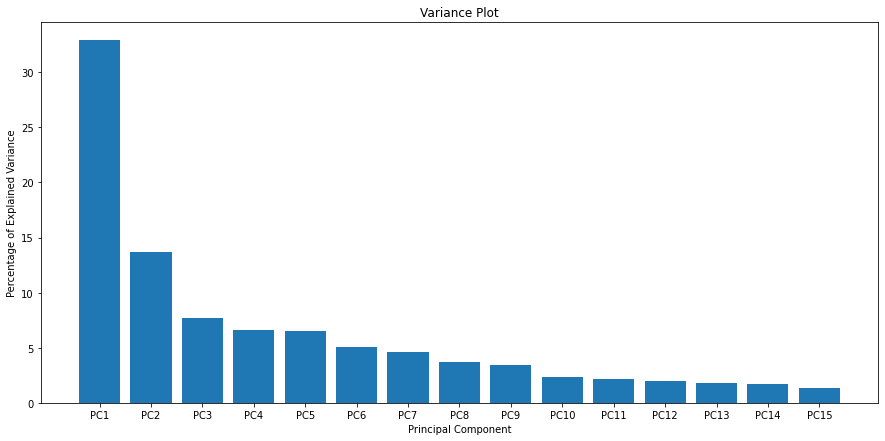

15

In [141]:
# # Visualizer Size
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 7]

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# Visualize Bar Plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Variance Plot')
plt.show()
pca.n_components_

Text(0, 0.5, 'Error Rate')

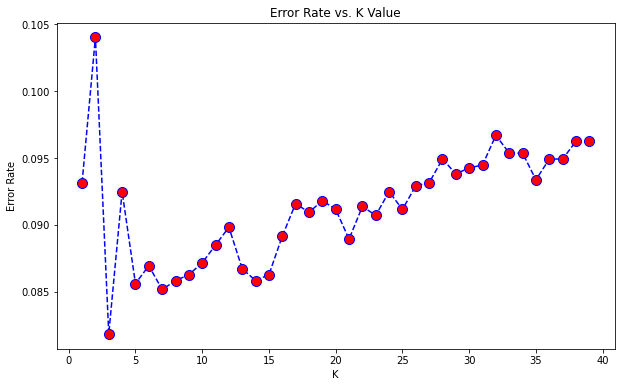

In [142]:
# used the elbow method to pick a good K Value
error_rate = []
  
# Will take some time
for i in range(1, 40):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(indepX_train, depY_train)
    pred_i = knn.predict(indepX_test)
    error_rate.append(np.mean(pred_i != depY_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [143]:
iv = df_norm
dv = df_target
iv_train , iv_test  , dv_train  , dv_test = train_test_split( iv , dv  )

# implementing k_Nearest_Neighbors Model 
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
classifier = neighbors.KNeighborsClassifier( n_neighbors = 3 , metric = 'euclidean' , p=2)
classifier.fit(iv_train, dv_train)
dv_train_pred = classifier.predict(iv_train)
dv_test_pred = classifier.predict(iv_test)

In [144]:
from sklearn.metrics import accuracy_score

print(accuracy_score( dv_test, dv_test_pred ))
print(accuracy_score(dv_train,dv_train_pred))

0.9167849538679915
0.9594866335462503


In [145]:
from sklearn.neighbors import KNeighborsClassifier
# Setup arrays to store training and test accuracies
neighbors = np.arange(1,25)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model 
    knn.fit(iv_train, dv_train) 
    #Compute accuracy on the training set 
    train_accuracy[i] = knn.score(iv_train, dv_train) 
    #Compute accuracy on the test set 
    test_accuracy[i] = knn.score(iv_test, dv_test)


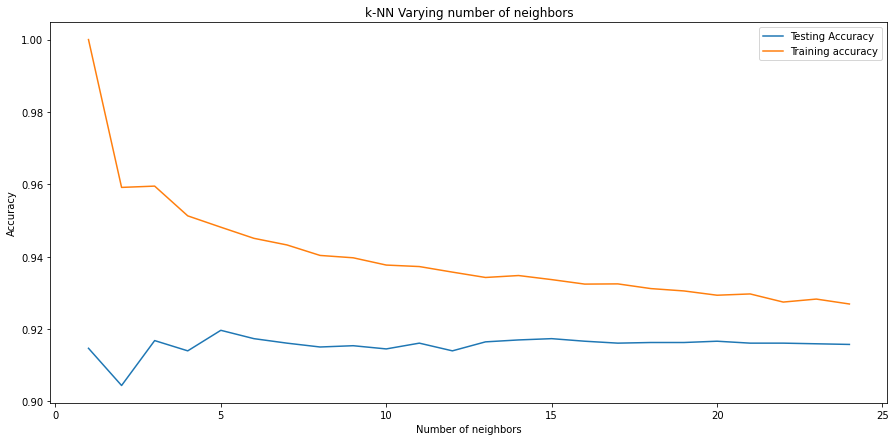

In [147]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
# <div class="open_grepper_editor" title="Edit & Save To Grepper"></div>

In [148]:
# KNN model result 

print ( (dv_train_pred == dv_train).sum() , dv_train.shape[0]   )
print ( (dv_test_pred  == dv_test ).sum() , dv_test.shape[0]    )

16223 16908
5167 5636


In [149]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(dv_test, dv_test_pred)
print(cm)

[[2165  297]
 [ 172 3002]]


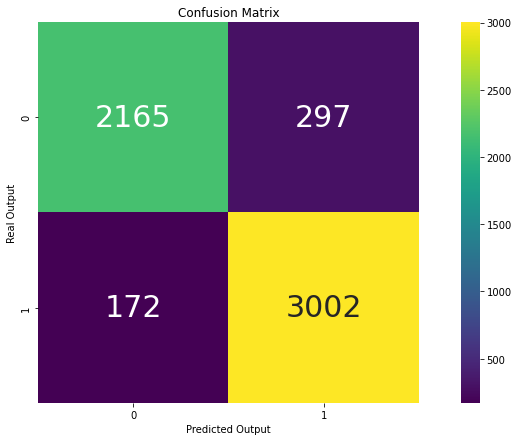

In [150]:
#confusion matrix visualization

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True,square=True, annot_kws={"size": 30},cmap="viridis", fmt='d', ax = ax)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Output')
plt.ylabel('Real Output')
plt.show()

In [151]:
from sklearn.metrics import classification_report

print(classification_report(dv_test, dv_test_pred ))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2462
           1       0.91      0.95      0.93      3174

    accuracy                           0.92      5636
   macro avg       0.92      0.91      0.91      5636
weighted avg       0.92      0.92      0.92      5636

